# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Exploratory Data Analysis

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 13.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
158229,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0757,0.1123,0.0024,0.4980,0,0,0,0
152203,0.0049,0.0024,0.0024,0.0024,0.0024,0.0073,0.1465,0.1611,0.0024,0.4980,0,0,0,0
302086,0.2246,0.0146,0.0146,0.0024,0.0024,0.1831,0.4102,0.8105,0.0049,0.1709,1,1,7,7
213189,0.0024,0.0024,0.0024,0.0024,0.0024,0.0537,0.4004,0.1538,0.0024,0.2173,4,0,14,0
268066,0.0024,0.0024,0.0024,0.0024,0.0024,0.0464,1.6626,0.1538,0.0024,0.2783,5,0,3,0


In [3]:
raw_data.shape

(456617, 14)

In [4]:
raw_data.columns

Index(['Emg1', 'Emg2', 'Emg3', 'Emg4', 'Emg5', 'Emg6', 'Emg7', 'Emg8', 'Emg9',
       'Emg10', 'repetition', 'rerepetition', 'stimulus', 'restimulus'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456617 entries, 0 to 456616
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          456617 non-null  float64
 1   Emg2          456617 non-null  float64
 2   Emg3          456617 non-null  float64
 3   Emg4          456617 non-null  float64
 4   Emg5          456617 non-null  float64
 5   Emg6          456617 non-null  float64
 6   Emg7          456617 non-null  float64
 7   Emg8          456617 non-null  float64
 8   Emg9          456617 non-null  float64
 9   Emg10         456617 non-null  float64
 10  repetition    456617 non-null  int64  
 11  rerepetition  456617 non-null  int64  
 12  stimulus      456617 non-null  int64  
 13  restimulus    456617 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 48.8 MB


In [6]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,456617.000000,456617.00000,456617.000000,456617.000000,456617.000000,456617.000000,456617.000000,456617.000000,456617.000000,456617.000000,456617.000000,456617.000000,456617.000000,456617.000000
mean,0.087577,0.11154,0.061346,0.020098,0.008846,0.090938,0.618475,0.313635,0.056314,0.273335,3.228675,2.073085,5.721548,3.711012
std,0.175377,0.27810,0.259189,0.122684,0.026813,0.155394,0.947964,0.324967,0.237637,0.115594,3.489333,3.210448,6.595727,6.071876
min,0.000000,0.00000,0.002400,0.000000,0.002400,0.000000,0.002400,0.002400,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000
25%,0.002400,0.00240,0.002400,0.002400,0.002400,0.002400,0.065900,0.131800,0.002400,0.212400,0.000000,0.000000,0.000000,0.000000
50%,0.024400,0.00240,0.002400,0.002400,0.002400,0.031700,0.156300,0.200200,0.002400,0.251500,2.000000,0.000000,3.000000,0.000000
75%,0.095200,0.00980,0.004900,0.002400,0.002400,0.122100,0.798300,0.373500,0.002400,0.297900,6.000000,4.000000,10.000000,6.000000
max,4.668000,4.66550,4.663100,4.521500,1.843300,3.176300,4.668000,4.668000,4.665500,3.840300,10.000000,10.000000,23.000000,23.000000


In [7]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     188571
8      15509
4      15506
12     15496
7      15495
2      15486
5      15477
11     15468
6      15464
9      15445
10     15440
3      15435
1      15424
13     10332
14     10327
17     10323
15     10294
16     10251
18      5162
19      5162
21      5161
22      5135
23      5128
20      5126
Name: stimulus, dtype: int64


Text(0, 0.5, 'Frequency')

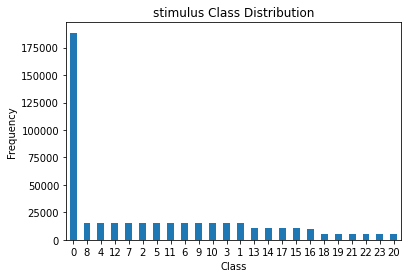

In [8]:
count_classes = pd.value_counts(raw_data['stimulus'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("stimulus Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

# Data Cleaning and Exploratory Data Analysis with New Data

In [9]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [10]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [11]:
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
169187,0.0073,0.0024,0.0024,0.0024,0.0024,0.0024,0.0464,0.0952,0.0024,0.3638,0,0,0,0
348975,0.3174,0.0830,0.0464,0.0024,0.0391,0.8228,1.4868,0.6079,0.1196,0.1929,3,3,12,12
84996,0.0024,0.0024,0.0024,0.0024,0.0024,0.0928,0.0854,0.0879,0.0024,0.2612,0,0,0,0
1103,0.0635,0.3369,0.0049,0.0024,0.0049,0.0024,0.1294,0.3809,0.0024,0.2979,0,0,0,0
248560,0.0098,0.0024,0.0024,0.0024,0.0317,0.5249,1.0620,0.3369,0.0024,0.2319,6,6,1,1


In [12]:
raw_data.shape

(354555, 14)

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354555 entries, 0 to 456616
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          354555 non-null  float64
 1   Emg2          354555 non-null  float64
 2   Emg3          354555 non-null  float64
 3   Emg4          354555 non-null  float64
 4   Emg5          354555 non-null  float64
 5   Emg6          354555 non-null  float64
 6   Emg7          354555 non-null  float64
 7   Emg8          354555 non-null  float64
 8   Emg9          354555 non-null  float64
 9   Emg10         354555 non-null  float64
 10  repetition    354555 non-null  int64  
 11  rerepetition  354555 non-null  int64  
 12  stimulus      354555 non-null  int64  
 13  restimulus    354555 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 40.6 MB


In [14]:
print(raw_data.isnull().any())

Emg1            False
Emg2            False
Emg3            False
Emg4            False
Emg5            False
Emg6            False
Emg7            False
Emg8            False
Emg9            False
Emg10           False
repetition      False
rerepetition    False
stimulus        False
restimulus      False
dtype: bool


In [15]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# Scalling Data

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
X = StandardScaler().fit_transform(X)

# Indipendent Component Analysis (ICA)

https://www.nmr.mgh.harvard.edu/mne/0.14/manual/preprocessing/ica.html

In [18]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=10)
X_ica = ica.fit_transform(X)

In [19]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_ica, y, test_size = 0.2, random_state = 39)

# Machine Learning Models

# Decision Tree Classifier

In [20]:
from sklearn import tree
tree = tree.DecisionTreeClassifier(ccp_alpha= 0.0,
              class_weight= None,
              criterion = "entropy",
              max_depth = None,
              max_features = None,
              max_leaf_nodes = None,
              min_impurity_decrease = 0.0,
              min_samples_leaf = 1,
              min_samples_split = 2,
              min_weight_fraction_leaf = 0.0,
              random_state = None,
              splitter = 'best')
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [21]:
y_pred1 = tree.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred1)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred1)* 100}")

Accuracy is: 82.95751011831733


Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93     37418
           1       0.79      0.79      0.79      1916
           2       0.77      0.78      0.77      1886
           3       0.77      0.76      0.76      2108
           4       0.74      0.73      0.73      1874
           5       0.73      0.71      0.72      1961
           6       0.75      0.75      0.75      2156
           7       0.75      0.73      0.74      1759
           8       0.71      0.72      0.72      1869
           9       0.62      0.63      0.63      1913
          10       0.70      0.68      0.69      1640
          11       0.73      0.72      0.72      1823
          12       0.73      0.74      0.73      1741
          13       0.74      0.74      0.74      1065
          14       0.56      0.58      0.57      1401
          15       0.63      0.63      0.63      1412
          16       0.69      0.68      0.69      1256
 

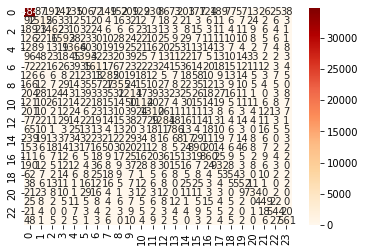

In [23]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred1))

cm = confusion_matrix(y_pred1, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Decision Tree

In [24]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

MAE: 1.3825781613571941
MSE: 16.20989691303183
RMSE: 4.026151625688212


In [25]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred1, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred1,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred1,average='weighted'))

Precision Score :  0.8293523937102247
Recall Score :  0.8295751011831732
f1_score :  0.8294292563439215


# KNeighborsClassifier

In [26]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier = KNeighborsClassifier(algorithm = 'ball_tree',
                                            leaf_size = 30,
                                            metric = 'minkowski',
                                            metric_params= None,
                                            n_jobs = -1,
                                            n_neighbors = 2,
                                            p = 1,
                                            weights = 'distance')
KNeighborsClassifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', n_jobs=-1, n_neighbors=2, p=1,
                     weights='distance')

In [27]:
y_pred2 = KNeighborsClassifier.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred2)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred2)* 100}")

Accuracy is: 91.79816953646119


Classification report : 
               precision    recall  f1-score   support

           0       0.95      0.96      0.95     37418
           1       0.93      0.91      0.92      1916
           2       0.89      0.87      0.88      1886
           3       0.91      0.88      0.89      2108
           4       0.91      0.89      0.90      1874
           5       0.90      0.89      0.90      1961
           6       0.93      0.93      0.93      2156
           7       0.88      0.84      0.86      1759
           8       0.86      0.86      0.86      1869
           9       0.85      0.83      0.84      1913
          10       0.87      0.86      0.87      1640
          11       0.89      0.86      0.87      1823
          12       0.91      0.90      0.90      1741
          13       0.92      0.90      0.91      1065
          14       0.75      0.75      0.75      1401
          15       0.80      0.80      0.80      1412
          16       0.87      0.85      0.86      1256
 

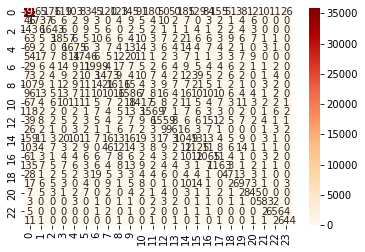

In [29]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred2))

cm = confusion_matrix(y_pred2, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- KNeighborsClassifier

In [30]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MAE: 0.7036425942378475
MSE: 8.403435292126751
RMSE: 2.8988679328535736


In [31]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred2, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred2,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred2,average='weighted'))

Precision Score :  0.9175785820520616
Recall Score :  0.9179816953646119
f1_score :  0.9176976342645424


# ExtraTreesClassifier

In [32]:
from sklearn.ensemble import ExtraTreesClassifier
extratree = ExtraTreesClassifier(bootstrap = False,
             ccp_alpha = 0.0,
             class_weight = None,
             criterion = 'entropy',
             max_depth = None,
             max_features = 'auto',
             max_leaf_nodes = None,
             max_samples = None,
             min_impurity_decrease = 0.0,
             min_samples_leaf = 1,
             min_samples_split = 2,
             min_weight_fraction_leaf = 0.0,
             n_estimators = 400,
             n_jobs = None,
             oob_score = False,
             random_state = None,
             verbose = 0,
             warm_start = False)
extratree.fit(X_train, y_train)

ExtraTreesClassifier(criterion='entropy', n_estimators=400)

In [33]:
y_pred5 = extratree.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred5)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred5)* 100}")

Accuracy is: 92.10559715699962


Classification report : 
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     37418
           1       0.96      0.89      0.93      1916
           2       0.96      0.85      0.90      1886
           3       0.93      0.86      0.89      2108
           4       0.94      0.86      0.90      1874
           5       0.91      0.87      0.89      1961
           6       0.94      0.91      0.92      2156
           7       0.91      0.82      0.86      1759
           8       0.92      0.84      0.88      1869
           9       0.90      0.81      0.85      1913
          10       0.91      0.83      0.87      1640
          11       0.95      0.82      0.88      1823
          12       0.93      0.88      0.90      1741
          13       0.95      0.86      0.91      1065
          14       0.78      0.71      0.74      1401
          15       0.83      0.81      0.82      1412
          16       0.93      0.81      0.86      1256
 

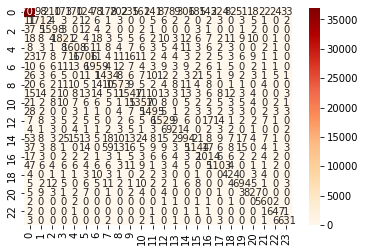

In [35]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred5))

cm = confusion_matrix(y_pred5, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- ExtraTreesClassifier

In [36]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred5))
print('MSE:', metrics.mean_squared_error(y_test, y_pred5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))

MAE: 0.6957594731423897
MSE: 8.456247972810989
RMSE: 2.907962856160819


In [37]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred5, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred5,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred5,average='weighted'))

Precision Score :  0.9210440665172005
Recall Score :  0.9210559715699962
f1_score :  0.9195144841493128


# Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier(
              bootstrap = True,
              ccp_alpha = 0.0,
              class_weight =  None,
              criterion = 'entropy',
              max_depth = None,
              max_features = 'auto' ,
              max_leaf_nodes = None,
              max_samples = None,
              min_impurity_decrease = 0.0,
              min_samples_leaf = 1,
              min_samples_split = 2,
              min_weight_fraction_leaf = 0.0,
              n_estimators = 400,
              n_jobs = None,
              oob_score = False,
              random_state = None,
              verbose = 0,
              warm_start = False)
RandomForestClassifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=400)

In [39]:
y_pred3 = RandomForestClassifier.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred3)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred3)* 100}")

Accuracy is: 91.37792444049583


Classification report : 
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     37418
           1       0.94      0.88      0.91      1916
           2       0.94      0.84      0.89      1886
           3       0.91      0.86      0.89      2108
           4       0.93      0.84      0.88      1874
           5       0.89      0.85      0.87      1961
           6       0.91      0.89      0.90      2156
           7       0.90      0.81      0.85      1759
           8       0.90      0.83      0.86      1869
           9       0.86      0.79      0.82      1913
          10       0.89      0.81      0.85      1640
          11       0.94      0.80      0.86      1823
          12       0.92      0.86      0.89      1741
          13       0.93      0.86      0.90      1065
          14       0.76      0.71      0.73      1401
          15       0.82      0.81      0.81      1412
          16       0.91      0.79      0.84      1256
 

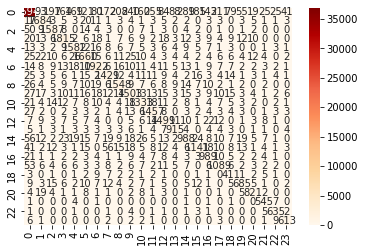

In [41]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred3))

cm = confusion_matrix(y_pred3, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Random Forest

In [42]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

MAE: 0.7420005358830083
MSE: 8.968961092073162
RMSE: 2.994822380721962


In [43]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred3, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred3,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred3,average='weighted'))

Precision Score :  0.9132227319389585
Recall Score :  0.9137792444049583
f1_score :  0.9120338700137455


# XGBoost

In [44]:
from xgboost import XGBClassifier
xgb = XGBClassifier(base_score = None,
              booster = 'gbtree',
              colsample_bylevel = None,
              colsample_bynode = None,
              colsample_bytree = None,
              enable_categorical = False,
              gamma = 0,
              gpu_id = None,
              importance_typen = None,
              interaction_constraints = None,
              learning_rate = 0.5,
              max_delta_step = None,
              max_depth = 50,
              min_child_weight = 1,
              monotone_constraints = None,
              n_estimators = 400,
              n_jobs = None,
              num_parallel_tree = None,
              objective = 'multi:softmax',
              predictor = 'gpu_predictor',
              random_state = None,
              reg_alpha = None,
              reg_lambda = None,
              scale_pos_weight = None,
              subsample = None,
              tree_method = None,
              use_label_encoder = True,
              validate_parameters = None,
              verbosity = None)
xgb.fit(X_train, y_train)

E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:00:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=0, importance_type=None, importance_typen=None,
              interaction_constraints='', learning_rate=0.5, max_delta_step=0,
              max_depth=50, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=400, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob',
              predictor='gpu_predictor', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [45]:
y_pred4 = xgb.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred4)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred4)* 100}")

Accuracy is: 90.45987223420909


Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     37418
           1       0.92      0.87      0.90      1916
           2       0.91      0.84      0.87      1886
           3       0.89      0.85      0.87      2108
           4       0.89      0.84      0.87      1874
           5       0.86      0.83      0.85      1961
           6       0.89      0.88      0.89      2156
           7       0.87      0.81      0.84      1759
           8       0.88      0.82      0.85      1869
           9       0.82      0.77      0.79      1913
          10       0.87      0.79      0.83      1640
          11       0.90      0.80      0.85      1823
          12       0.90      0.85      0.87      1741
          13       0.90      0.86      0.88      1065
          14       0.73      0.69      0.71      1401
          15       0.79      0.77      0.78      1412
          16       0.88      0.79      0.83      1256
 

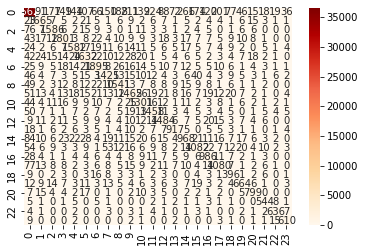

In [47]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred4))

cm = confusion_matrix(y_pred4, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- XGBoost

In [48]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred4))
print('MSE:', metrics.mean_squared_error(y_test, y_pred4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))

MAE: 0.7990438718957567
MSE: 9.523444881612162
RMSE: 3.0860079198881136


In [49]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred4, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred4,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred4,average='weighted'))

Precision Score :  0.9030304934128874
Recall Score :  0.9045987223420908
f1_score :  0.9029864639768204
